In [2]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
path="/content/product_reviews_dataset.csv"

In [5]:
df=pd.read_csv(path, on_bad_lines='skip')

In [20]:
df.head(3)

,review_text,review_label,cleaned_review
0,Good value for money. Highly recommend! Very u...,good,good valu money highli recommend use easi use ...
1,Five stars! Very useful and easy to use.,good,five star use easi use
2,Very useful and easy to use. Very useful and e...,good,use easi use use easi use highli recommend


In [22]:
df=df[['review_text','review_label']]
df.dropna()

,review_text,review_label
0,Good value for money. Highly recommend! Very u...,good
1,Five stars! Very useful and easy to use.,good
2,Very useful and easy to use. Very useful and e...,good
3,Loved it. Very useful and easy to use. Excelle...,good
4,Worst product ever! Very disappointed.,worst
...,...,...
995,Amazing quality and value. Amazing quality and...,good
996,Good value for money. Highly recommend! Perfec...,good
997,Good value for money. Very useful and easy to ...,good
998,Low quality material. Had some issues.,bad


In [23]:
df['review_label'].value_counts()

,count
review_label,
worst,347
good,330
bad,323


In [24]:
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

In [25]:
def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review_text'].astype(str).apply(preprocess)

In [26]:
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(df['cleaned_review']).toarray()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
y=df['review_label']
y=le.fit_transform(y)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [48]:
model.score(X_train,y_train)

0.99875

In [49]:
y_pred = model.predict(X_test)

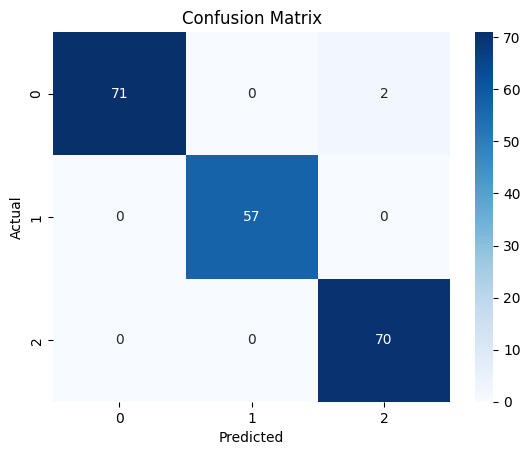

In [50]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
def analyze_sentiment(user_input):
  cleaned=preprocess(user_input)
  vector=tfidf.transform([cleaned])
  prediction=model.predict(vector)[0]
  sentiment_label=le.inverse_transform([prediction])[0]
  return f"Sentiment: {sentiment_label.upper()}"

In [52]:
interface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter product review here..."),
    outputs="text",
    title="Sentiment Analysis App",
    description="Enter a product review. The model will predict whether it's GOOD or WORST."
)


In [53]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5b0d149fece1b82ead.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
